In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [26]:
df = pd.read_csv('scaler_clustering.csv')

In [27]:
df

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0
...,...,...,...,...,...,...,...
205838,206918,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b...,2008.0,220000,NaN,2019.0
205839,206919,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b42...,2017.0,500000,NaN,2020.0
205840,206920,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c...,2021.0,700000,NaN,2021.0
205841,206921,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c8...,2019.0,5100000,NaN,2019.0


# Problem Statement: Creating clusters for groups of learners with similar characteristics. The dataset we are working is from Scaler.

In [28]:
df[df['email_hash'] == df.iloc[1,2]]

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
22950,22968,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,Other,2019.0


In [29]:
# We already have indexes from pandas, we don't need an additional column mentioning the indexes explicitly.
df.drop(columns = ['Unnamed: 0'], inplace = True)

In [30]:
df

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0
...,...,...,...,...,...,...
205838,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b...,2008.0,220000,NaN,2019.0
205839,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b42...,2017.0,500000,NaN,2020.0
205840,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c...,2021.0,700000,NaN,2021.0
205841,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c8...,2019.0,5100000,NaN,2019.0


# EDA - Exploratory Data Analysis

In [31]:
df.describe()

,orgyear,ctc,ctc_updated_year
count,205757.000000,2.058430e+05,205843.000000
mean,2014.882750,2.271685e+06,2019.628231
std,63.571115,1.180091e+07,1.325104
min,0.000000,2.000000e+00,2015.000000
25%,2013.000000,5.300000e+05,2019.000000
50%,2016.000000,9.500000e+05,2020.000000
75%,2018.000000,1.700000e+06,2021.000000
max,20165.000000,1.000150e+09,2021.000000


### We see that org year has a maximum value of 20165! Let's do some data cleaning.

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   company_hash      205799 non-null  object 
 1   email_hash        205843 non-null  object 
 2   orgyear           205757 non-null  float64
 3   ctc               205843 non-null  int64  
 4   job_position      153279 non-null  object 
 5   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.4+ MB


In [33]:
df['orgyear'].sort_values(ascending = False).head(10)

203992    20165.0
183768    20165.0
158310     2204.0
33670      2107.0
3651       2106.0
32240      2101.0
2211       2031.0
102879     2031.0
86005      2031.0
101302     2031.0
Name: orgyear, dtype: float64

In [34]:
df['company_hash'].value_counts(ascending = False)

company_hash
nvnv wgzohrnvzwj otqcxwto              8337
xzegojo                                5381
vbvkgz                                 3481
zgn vuurxwvmrt vwwghzn                 3411
wgszxkvzn                              3240
                                       ... 
smh wgzohrnxzs                            1
tqgo xzntqzvnxgzrv                        1
zthqgojzvunxw wgbbhzxwvnxgz ucn rna       1
bvuihton                                  1
bvszgz tsurho ucn rna                     1
Name: count, Length: 37299, dtype: int64

In [35]:
df['email_hash'].value_counts(ascending = False)

email_hash
bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b    10
298528ce3160cc761e4dc37a07337ee2e0589df251d73645aae209b010210eee     9
3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94f1c88c5e15a6f31378     9
6842660273f70e9aa239026ba33bfe82275d6ab0d20124021b952b5bc3d07e6c     9
b4d5afa09bec8689017d8b29701b80d664ca37b83cb883376b2e95191320da66     8
                                                                    ..
97f9acab2edf988fcec48e072b88f3731affd6db4487cbf80f20754bd809e1de     1
bdab9809d6e7c8ffd1fe8ebba7e14380b60db40c0f5450199c0a05ad9aa646dc     1
21ede5c319de27a6e2175b46d030e12e72d3d5ca9953ba448bee138fba2c57d3     1
3201950d49607287627626a0c3568cad1ab7b9ecc11e7d69ae1fcfdd32cff2f3     1
faa7431795fe5a112893353d47ceb114be2ebdc1f0dff15e62e91633aae6c5e3     1
Name: count, Length: 153443, dtype: int64

In [36]:
df['job_position'].value_counts(ascending = False)

job_position
Backend Engineer              43554
FullStack Engineer            24717
Other                         18071
Frontend Engineer             10417
Engineering Leadership         6870
                              ...  
Applied Scientist                 1
Member Technical Staff III        1
Web / UI Designer                 1
Azure data Factory                1
SDET 3                            1
Name: count, Length: 1016, dtype: int64

In [37]:
df[df['email_hash'] == 'bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b']

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
24109,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,NaN,2020.0
45984,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,Support Engineer,2020.0
72315,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,Other,2020.0
102915,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,FullStack Engineer,2020.0
117764,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,Data Analyst,2020.0
121483,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,Other,2019.0
124476,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,Support Engineer,2019.0
144479,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,FullStack Engineer,2019.0
152801,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,Devops Engineer,2019.0
159835,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,NaN,2019.0


In [38]:
df['job_position'].value_counts(ascending = False).head(15)

job_position
Backend Engineer          43554
FullStack Engineer        24717
Other                     18071
Frontend Engineer         10417
Engineering Leadership     6870
QA Engineer                6587
Data Scientist             5368
Android Engineer           5357
SDET                       4967
Devops Engineer            4612
Support Engineer           3603
Data Analyst               2906
iOS Engineer               2746
Engineering Intern         2692
Product Designer           1314
Name: count, dtype: int64

## Treating Null values and fixing the org year column.

In [39]:
df.isna().sum()

company_hash           44
email_hash              0
orgyear                86
ctc                     0
job_position        52564
ctc_updated_year        0
dtype: int64

In [40]:
df.loc[df['orgyear']>df['ctc_updated_year'],'orgyear']= df[df['orgyear']>df['ctc_updated_year']]['ctc_updated_year']

In [41]:
 df[df['orgyear']>df['ctc_updated_year']]

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year


In [42]:
df['orgyear'].max()

2021.0

### Imputing missing org year with ctc_updated_year

In [43]:
df['orgyear'].fillna(df['ctc_updated_year'],inplace = True)

In [44]:
df['orgyear'].isna().sum()

0

In [45]:
df['orgyear'].sort_values().head(15)

56770     0.0
63629     0.0
193131    0.0
184479    0.0
40553     0.0
117087    0.0
100415    0.0
99408     0.0
13424     0.0
30335     0.0
62717     0.0
101678    0.0
106669    0.0
33117     0.0
74313     0.0
Name: orgyear, dtype: float64

In [46]:
df.loc[df['orgyear']==0,'orgyear'] = df.loc[df['orgyear']==0,'ctc_updated_year']

In [47]:
df['orgyear'].sort_values().head(25)

196354      1.0
149468      1.0
188483      2.0
167456      2.0
90049       2.0
74945       3.0
124319      3.0
119329      3.0
66344       3.0
165075      3.0
84882       3.0
94051       4.0
94689       5.0
143238      5.0
178024      6.0
175205      6.0
159224     38.0
121487     83.0
68701      91.0
41361      91.0
80500      91.0
188672    200.0
163455    201.0
17139     206.0
13698     208.0
Name: orgyear, dtype: float64

### We still find that there are year's which are less than 2000

In [48]:
df['ctc_updated_year'].min()

2015.0

In [49]:
df.loc[df['orgyear']<1980,:]

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
3908,sggsrt,5756870d895deca920251df2377dad261084904a4f9d10...,1973.0,1000,Co-founder,2020.0
13698,oxtbtzo,4a64fdec422e657b175d5dd914b91e0df7c78ec7716bfe...,208.0,500000,NaN,2020.0
15323,nvnv wgzohrnvzwj otqcxwto nwo,437fa88cd652351931ef679e6b074aa91acb384ef193dd...,209.0,300000,NaN,2021.0
17139,sgxmxmg,6db474dae5093f975e43697cd77ac5a486248c26235778...,206.0,1500000,NaN,2021.0
31368,vbagwo,86dbdeada523d09881aec29ffa56ff63aca56f0278a97e...,1970.0,1800000,NaN,2021.0
32665,st ytvrnywvqt,de72685914984cd9e1b0ec13223cd266f3c81d9517f282...,1972.0,2300000,Engineering Leadership,2019.0
41361,otqcxwtzgf,b60d93faa9a96e2d8362f0b6f16aac79dc484560356ff3...,91.0,1000000,NaN,2021.0
66344,fxkzx ogenfvqt uqxcvnt rxbxnta,583d48749d8f694951a25ceebe4c0cdebc814a5b6def5b...,3.0,1800000,Product Designer,2019.0
68701,vzshrvq atcqrgutq,1978da71c14333352d051bfb6054904770b70cecce389d...,91.0,400000,Devops Engineer,2021.0
74945,fgrntqo prhftq,e0501afab1e9cc00253928e1488701685039437b1780f6...,3.0,1580000,Engineering Leadership,2019.0


In [50]:
# We are imputing org year with ctc_updated_year for those values whose year is less than 2000
df.loc[df['orgyear']<2000,'orgyear'] = df.loc[df['orgyear']<2000,'ctc_updated_year']

In [51]:
df.loc[df['orgyear']<1980,:]

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year


In [ ]:
df.head(10)

### Imputing null values with other

In [53]:
df['job_position'] = df['job_position'].fillna("Other")
df['company_hash'] = df['company_hash'].fillna("Other")

In [54]:
df.drop_duplicates(inplace = True)

In [55]:
df.isna().sum()

company_hash        0
email_hash          0
orgyear             0
ctc                 0
job_position        0
ctc_updated_year    0
dtype: int64

In [56]:
df

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0
...,...,...,...,...,...,...
205838,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b...,2008.0,220000,Other,2019.0
205839,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b42...,2017.0,500000,Other,2020.0
205840,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c...,2021.0,700000,Other,2021.0
205841,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c8...,2019.0,5100000,Other,2019.0


In [57]:
df['job_position'].nunique()

1016

## Cleaning job role column

In [58]:
job = pd.read_csv('scaler_job_positions_mapping VX.csv')
job

,Original,New
0,7,others
1,91,others
2,737,others
3,857628,others
4,896651,others
...,...,...
796,worker,others
797,x,others
798,young professional ii,young professional 2
799,zomato,others


In [60]:
import re
def remove_special (string):
    new_string=re.sub('[^A-Za-z ]+', '', string)
    return new_string
    

In [61]:
df.job_position=df.job_position.apply(lambda x: remove_special(str(x)))
df.job_position=df.job_position.apply(lambda x: x.lower())
df.job_position=df.job_position.apply(lambda x: x.strip())
df.job_position

0                      other
1         fullstack engineer
2           backend engineer
3           backend engineer
4         fullstack engineer
                 ...        
205838                 other
205839                 other
205840                 other
205841                 other
205842                 other
Name: job_position, Length: 201453, dtype: object

In [ ]:
df

In [62]:
df_merge = df.merge(job, left_on = 'job_position', right_on = 'Original', how = 'left')

In [63]:
df_merge

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Original,New
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,other,2020.0,other,others
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,fullstack engineer,2019.0,fullstack engineer,fullstack devloper
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,backend engineer,2020.0,backend engineer,backend engineer
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,backend engineer,2019.0,backend engineer,backend engineer
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,fullstack engineer,2019.0,fullstack engineer,fullstack devloper
...,...,...,...,...,...,...,...,...
201448,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b...,2008.0,220000,other,2019.0,other,others
201449,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b42...,2017.0,500000,other,2020.0,other,others
201450,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c...,2021.0,700000,other,2021.0,other,others
201451,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c8...,2019.0,5100000,other,2019.0,other,others


In [64]:
df_merge.drop(columns = ['job_position', 'Original'], inplace = True)

In [65]:
df_merge = df_merge.rename(columns = {'New': 'job_position'})
df_merge

,company_hash,email_hash,orgyear,ctc,ctc_updated_year,job_position
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,2020.0,others
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,2019.0,fullstack devloper
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,2020.0,backend engineer
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,2019.0,backend engineer
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,2019.0,fullstack devloper
...,...,...,...,...,...,...
201448,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b...,2008.0,220000,2019.0,others
201449,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b42...,2017.0,500000,2020.0,others
201450,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c...,2021.0,700000,2021.0,others
201451,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c8...,2019.0,5100000,2019.0,others


In [66]:
df_merge['job_position'].value_counts()

job_position
others                            66915
backend engineer                  43547
fullstack devloper                25983
frontend developer                10424
engineering leadership             6870
                                  ...  
tech manager                          1
principal application engineer        1
sap cpq consultant                    1
clerk                                 1
founders office                       1
Name: count, Length: 554, dtype: int64

In [67]:
df_merge.drop_duplicates(inplace = True)

In [68]:
df_merge

,company_hash,email_hash,orgyear,ctc,ctc_updated_year,job_position
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,2020.0,others
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,2019.0,fullstack devloper
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,2020.0,backend engineer
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,2019.0,backend engineer
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,2019.0,fullstack devloper
...,...,...,...,...,...,...
201448,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b...,2008.0,220000,2019.0,others
201449,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b42...,2017.0,500000,2020.0,others
201450,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c...,2021.0,700000,2021.0,others
201451,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c8...,2019.0,5100000,2019.0,others


In [ ]:
df_merge.isna().sum()

### Dropping duplicate rows

In [69]:
df_merge = df_merge.fillna('others').drop_duplicates()
df_merge

,company_hash,email_hash,orgyear,ctc,ctc_updated_year,job_position
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,2020.0,others
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,2019.0,fullstack devloper
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,2020.0,backend engineer
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,2019.0,backend engineer
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,2019.0,fullstack devloper
...,...,...,...,...,...,...
201448,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b...,2008.0,220000,2019.0,others
201449,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b42...,2017.0,500000,2020.0,others
201450,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c...,2021.0,700000,2021.0,others
201451,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c8...,2019.0,5100000,2019.0,others


In [70]:
df_merge.isna().sum()

company_hash        0
email_hash          0
orgyear             0
ctc                 0
ctc_updated_year    0
job_position        0
dtype: int64

## Feature Engineering: Creating 'experience' column

In [71]:
df_merge['experience'] = 2022 - df_merge['orgyear']

In [72]:
df_merge

,company_hash,email_hash,orgyear,ctc,ctc_updated_year,job_position,experience
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,2020.0,others,6.0
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,2019.0,fullstack devloper,4.0
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,2020.0,backend engineer,7.0
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,2019.0,backend engineer,5.0
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,2019.0,fullstack devloper,5.0
...,...,...,...,...,...,...,...
201448,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b...,2008.0,220000,2019.0,others,14.0
201449,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b42...,2017.0,500000,2020.0,others,5.0
201450,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c...,2021.0,700000,2021.0,others,1.0
201451,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c8...,2019.0,5100000,2019.0,others,3.0


In [73]:
df_merge[df_merge['experience']<0]

,company_hash,email_hash,orgyear,ctc,ctc_updated_year,job_position,experience


## Univariate Analysis

<Axes: xlabel='orgyear', ylabel='Density'>

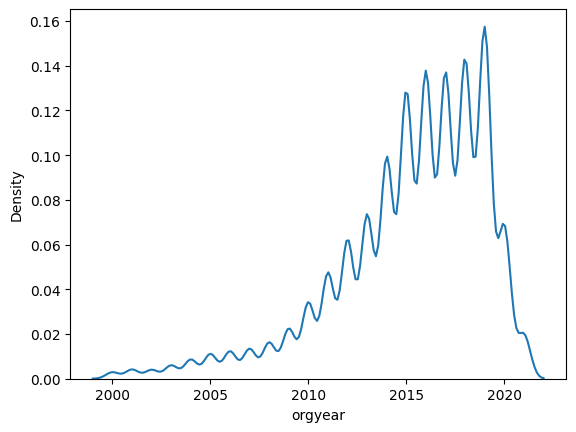

In [74]:
sns.kdeplot(x = df_merge['orgyear'])

<Axes: xlabel='ctc', ylabel='Density'>

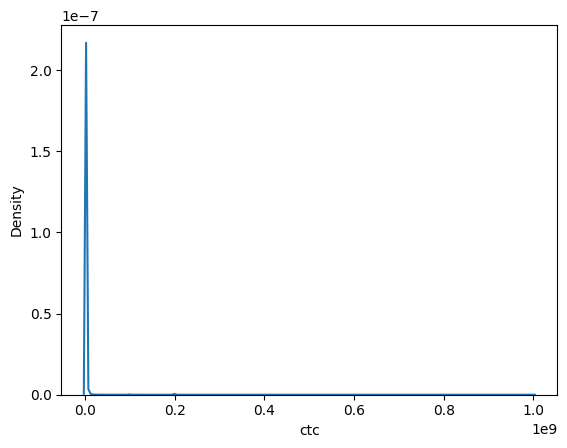

In [75]:
sns.kdeplot(x = df_merge['ctc'])

<Axes: xlabel='ctc_updated_year', ylabel='Density'>

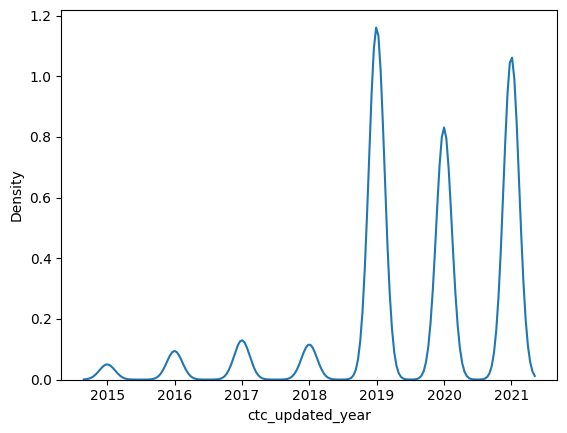

In [76]:
sns.kdeplot(x = df_merge['ctc_updated_year'])

<Axes: xlabel='experience', ylabel='Density'>

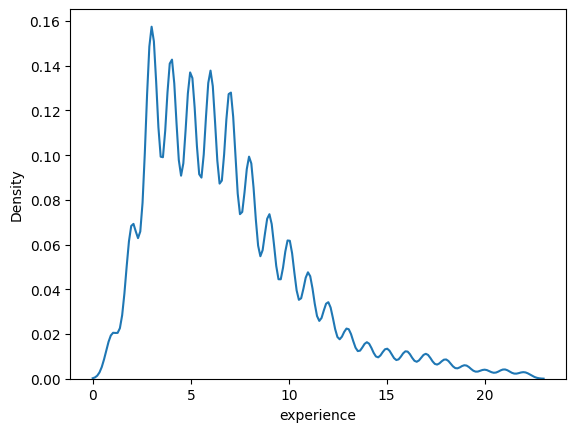

In [77]:
sns.kdeplot(x = df_merge['experience'])

In [78]:
threshold = np.percentile(df_merge['ctc'],99)

<Axes: xlabel='ctc', ylabel='Density'>

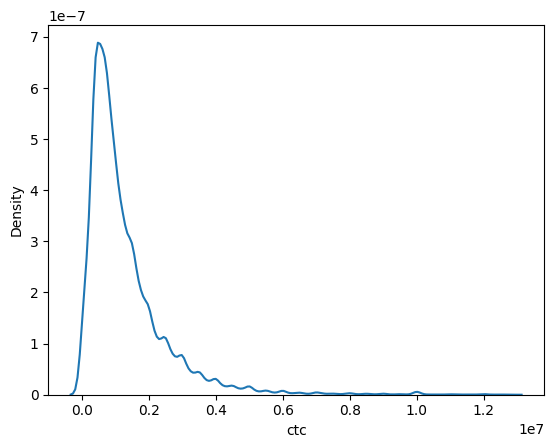

In [79]:
sns.kdeplot(x = df_merge.loc[df_merge['ctc']<threshold, 'ctc'])

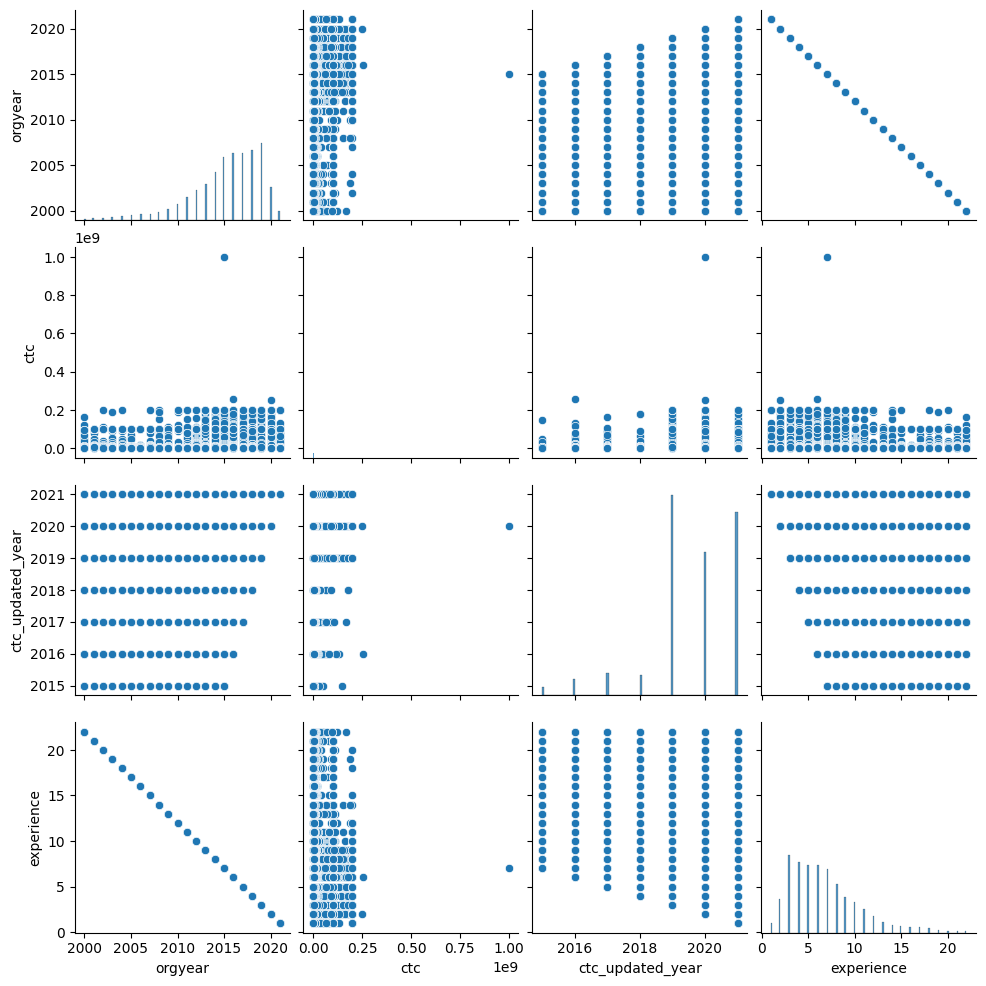

In [80]:
sns.pairplot(df_merge[['orgyear' , 'ctc', 'ctc_updated_year', 'experience']])

<Axes: >

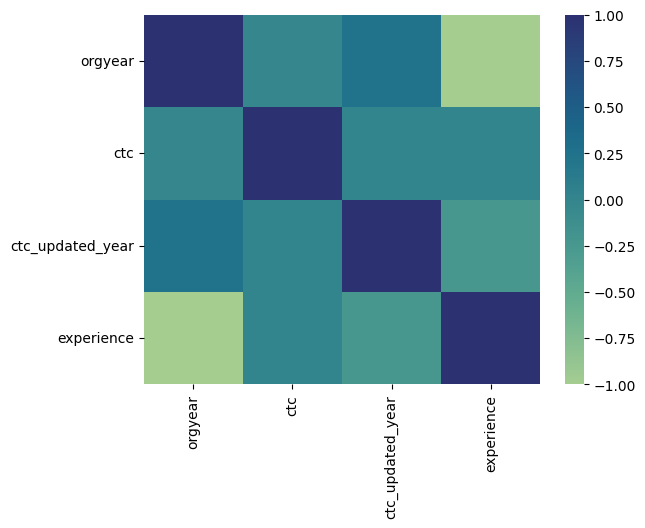

In [81]:
sns.heatmap(df_merge[['orgyear' , 'ctc', 'ctc_updated_year', 'experience']].corr(), cmap ="crest")

## Manual Clustering

In [ ]:
df_merge

In [123]:
designation = df_merge.groupby(['company_hash', 'job_position', 'experience'])['ctc'].describe()

In [84]:
designation

count  \
company_hash                   job_position       experience          
0                              others             2.0           1.0   
0000                           others             5.0           1.0   
01 ojztqsj                     android engineer   6.0           1.0   
                               frontend developer 11.0          1.0   
05mz exzytvrny uqxcvnt rxbxnta backend engineer   3.0           1.0   
...                                                             ...   
zz                             others             13.0          1.0   
zzb ztdnstz vacxogqj ucn rna   fullstack devloper 5.0           1.0   
                               others             5.0           1.0   
zzgato                         others             8.0           1.0   
zzzbzb                         others             2.0           1.0   

                                                                   mean  std  \
company_hash                   job_position       experience                   
0                              others             2.0          100000.0  NaN   
0000                           others             5.0          300000.0  NaN   
01 ojztqsj                     android engineer   6.0          270000.0  NaN   
                               frontend developer 11.0         830000.0  NaN   
05mz exzytvrny uqxcvnt rxbxnta backend engineer   3.0         1100000.0  NaN   
...                                                                 ...  ...   
zz                             others             13.0         500000.0  NaN   
zzb ztdnstz vacxogqj ucn rna   fullstack devloper 5.0          600000.0  NaN   
                               others             5.0          600000.0  NaN   
zzgato                         others             8.0          130000.0  NaN   
zzzbzb                         others             2.0          720000.0  NaN   

                                                                    min  \
company_hash                   job_position       experience              
0                              others             2.0          100000.0   
0000                           others             5.0          300000.0   
01 ojztqsj                     android engineer   6.0          270000.0   
                               frontend developer 11.0         830000.0   
05mz exzytvrny uqxcvnt rxbxnta backend engineer   3.0         1100000.0   
...                                                                 ...   
zz                             others             13.0         500000.0   
zzb ztdnstz vacxogqj ucn rna   fullstack devloper 5.0          600000.0   
                               others             5.0          600000.0   
zzgato                         others             8.0          130000.0   
zzzbzb                         others             2.0          720000.0   

                                                                    25%  \
company_hash                   job_position       experience              
0                              others             2.0          100000.0   
0000                           others             5.0          300000.0   
01 ojztqsj                     android engineer   6.0          270000.0   
                               frontend developer 11.0         830000.0   
05mz exzytvrny uqxcvnt rxbxnta backend engineer   3.0         1100000.0   
...                                                                 ...   
zz                             others             13.0         500000.0   
zzb ztdnstz vacxogqj ucn rna   fullstack devloper 5.0          600000.0   
                               others             5.0          600000.0   
zzgato                         others             8.0          130000.0   
zzzbzb                         others             2.0          720000.0   

                                                                    50%  \
company_hash                   job_position       experience          

In [115]:
classe = df_merge.groupby(['company_hash', 'job_position'])['ctc'].describe()

In [116]:
tier = df_merge.groupby(['company_hash'])['ctc'].describe()

In [87]:
designation.to_csv('designation.csv')

In [117]:
classe.to_csv('classe.csv')

In [118]:
tier.to_csv('tier.csv')

In [90]:
df_merge.to_csv('scaler_clustering_df_merge.csv')

In [124]:
df2 = df_merge.merge(designation, how = 'left', left_on = ['company_hash', 'job_position', 'experience'], right_index = True)

In [125]:
df2['designation'] = df2.apply(lambda x:3 if x['ctc']<x['50%'] else ( 1 if x['ctc']>x['75%'] else 2), axis = 1)

In [126]:
df2.drop(columns = ['count', 'mean', 'std','min', '25%', '50%', '75%', 'max'], inplace = True)

In [127]:
df2['designation'].value_counts()

designation
2    118115
3     49974
1     32793
Name: count, dtype: int64

In [128]:
df2

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,ctc_updated_year,job_position,experience,designation
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,2020.0,others,6.0,2
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,2019.0,fullstack devloper,4.0,3
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,2020.0,backend engineer,7.0,2
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,2019.0,backend engineer,5.0,3
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,2019.0,fullstack devloper,5.0,2
...,...,...,...,...,...,...,...,...,...
200877,201448,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b...,2008.0,220000,2019.0,others,14.0,2
200878,201449,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b42...,2017.0,500000,2020.0,others,5.0,3
200879,201450,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c...,2021.0,700000,2021.0,others,1.0,3
200880,201451,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c8...,2019.0,5100000,2019.0,others,3.0,1


In [129]:
df2 = df2.merge(classe, how = 'left', left_on = ['company_hash', 'job_position'], right_index = True)

In [130]:
df2['class'] = df2.apply(lambda x:3 if x['ctc']<x['50%'] else ( 1 if x['ctc']>x['75%'] else 2), axis = 1)

In [131]:
df2.drop(columns = ['count', 'mean', 'std','min', '25%', '50%', '75%', 'max'], inplace = True)

In [132]:
df2

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,ctc_updated_year,job_position,experience,designation,class
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,2020.0,others,6.0,2,1
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,2019.0,fullstack devloper,4.0,3,3
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,2020.0,backend engineer,7.0,2,2
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,2019.0,backend engineer,5.0,3,3
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,2019.0,fullstack devloper,5.0,2,1
...,...,...,...,...,...,...,...,...,...,...
200877,201448,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b...,2008.0,220000,2019.0,others,14.0,2,3
200878,201449,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b42...,2017.0,500000,2020.0,others,5.0,3,3
200879,201450,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c...,2021.0,700000,2021.0,others,1.0,3,3
200880,201451,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c8...,2019.0,5100000,2019.0,others,3.0,1,1


In [133]:
df2 = df2.merge(tier, how = 'left', left_on = ['company_hash'], right_index = True)
df2['tier'] = df2.apply(lambda x:3 if x['ctc']<x['50%'] else ( 1 if x['ctc']>x['75%'] else 2), axis = 1)
df2.drop(columns = ['count', 'mean', 'std','min', '25%', '50%', '75%', 'max'], inplace = True)
df2

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,ctc_updated_year,job_position,experience,designation,class,tier
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,2020.0,others,6.0,2,1,2
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,2019.0,fullstack devloper,4.0,3,3,3
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,2020.0,backend engineer,7.0,2,2,2
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,2019.0,backend engineer,5.0,3,3,3
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,2019.0,fullstack devloper,5.0,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...
200877,201448,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b...,2008.0,220000,2019.0,others,14.0,2,3,3
200878,201449,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b42...,2017.0,500000,2020.0,others,5.0,3,3,3
200879,201450,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c...,2021.0,700000,2021.0,others,1.0,3,3,3
200880,201451,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c8...,2019.0,5100000,2019.0,others,3.0,1,1,1


In [113]:
df_merge = pd.read_csv('scaler_clustering_df_merge.csv')

In [114]:
designation = pd.read_csv('designation.csv')

In [122]:
designation

,company_hash,job_position,experience,count,mean,std,min,25%,50%,75%,max
0,0,others,2.0,1.0,100000.0,NaN,100000.0,100000.0,100000.0,100000.0,100000.0
1,0000,others,5.0,1.0,300000.0,NaN,300000.0,300000.0,300000.0,300000.0,300000.0
2,01 ojztqsj,android engineer,6.0,1.0,270000.0,NaN,270000.0,270000.0,270000.0,270000.0,270000.0
3,01 ojztqsj,frontend developer,11.0,1.0,830000.0,NaN,830000.0,830000.0,830000.0,830000.0,830000.0
4,05mz exzytvrny uqxcvnt rxbxnta,backend engineer,3.0,1.0,1100000.0,NaN,1100000.0,1100000.0,1100000.0,1100000.0,1100000.0
...,...,...,...,...,...,...,...,...,...,...,...
107660,zz,others,13.0,1.0,500000.0,NaN,500000.0,500000.0,500000.0,500000.0,500000.0
107661,zzb ztdnstz vacxogqj ucn rna,fullstack devloper,5.0,1.0,600000.0,NaN,600000.0,600000.0,600000.0,600000.0,600000.0
107662,zzb ztdnstz vacxogqj ucn rna,others,5.0,1.0,600000.0,NaN,600000.0,600000.0,600000.0,600000.0,600000.0
107663,zzgato,others,8.0,1.0,130000.0,NaN,130000.0,130000.0,130000.0,130000.0,130000.0


In [142]:
df2.to_csv('df2.csv')

In [141]:
df2.drop(columns = ['Unnamed: 0'], inplace = True)

### Top 10 employees (earning more than most of the employees in the company) - Tier 1

In [147]:
def row_number(x):
    n = x.shape[0]
    x['new_col'] = np.arange(1,n+1)
    return x

In [148]:
row_number(df2)

,company_hash,email_hash,orgyear,ctc,ctc_updated_year,job_position,experience,designation,class,tier,new_col
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,2020.0,others,6.0,2,1,2,1
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,2019.0,fullstack devloper,4.0,3,3,3,2
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,2020.0,backend engineer,7.0,2,2,2,3
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,2019.0,backend engineer,5.0,3,3,3,4
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,2019.0,fullstack devloper,5.0,2,1,1,5
...,...,...,...,...,...,...,...,...,...,...,...
200877,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b...,2008.0,220000,2019.0,others,14.0,2,3,3,200878
200878,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b42...,2017.0,500000,2020.0,others,5.0,3,3,3,200879
200879,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c...,2021.0,700000,2021.0,others,1.0,3,3,3,200880
200880,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c8...,2019.0,5100000,2019.0,others,3.0,1,1,1,200881


In [150]:
abc = df.sort_values(['company_hash', 'ctc'], ascending = False).groupby('company_hash').apply(row_number)

In [153]:
abc.sort_values(['new_col', 'ctc'], ascending = False)

company_hash  \
company_hash                                                  
nvnv wgzohrnvzwj otqcxwto 171196  nvnv wgzohrnvzwj otqcxwto   
                          190515  nvnv wgzohrnvzwj otqcxwto   
                          153355  nvnv wgzohrnvzwj otqcxwto   
                          70697   nvnv wgzohrnvzwj otqcxwto   
                          126100  nvnv wgzohrnvzwj otqcxwto   
...                                                     ...   
uqgmrtb ogrcxzs           82028             uqgmrtb ogrcxzs   
vcvzn sqghu               166398                vcvzn sqghu   
ftm ongqt                 91552                   ftm ongqt   
uqvpqxnx voogwxvnto       54820         uqvpqxnx voogwxvnto   
xm                        183804                         xm   

                                                                         email_hash  \
company_hash                                                                          
nvnv wgzohrnvzwj otqcxwto 171196  80ba0259f9f59034c4927cf3bd38dc9ce2eb60ff18135b...   
                          190515  8625d6d072e12dad0c5748ab010e1d0315736a359e2bb5...   
                          153355  df7c304afd58e84f19d732e2292249430b499c2d4c2f23...   
                          70697   df7c304afd58e84f19d732e2292249430b499c2d4c2f23...   
                          126100  e83bf2daa55df532e27a8f71a4abf6e069089dd29db271...   
...                                                                             ...   
uqgmrtb ogrcxzs           82028   edcfb902656b736e1f35863298706d9d34ee795b7ed85a...   
vcvzn sqghu               166398  c411a6917058b50f44d7c62751be9b232155b23211de4c...   
ftm ongqt                 91552   512f761579fb116e215cabc9821c7f81153f0763e16018...   
uqvpqxnx voogwxvnto       54820   8786759b95d673466e94f62f1b15e4f8c6bd7de6164074...   
xm                        183804  75357254a31f133e2d3870057922feddeba82b88056a07...   

                                  orgyear   ctc            job_position  \
company_hash                                                              
nvnv wgzohrnvzwj otqcxwto 171196   2012.0   600        backend engineer   
                          190515   2013.0  1000       frontend engineer   
                          153355   2018.0  3300        support engineer   
                          70697    2018.0  3300                   other   
                          126100   2018.0  3360                   other   
...                                   ...   ...                     ...   
uqgmrtb ogrcxzs           82028    2018.0   500               cofounder   
vcvzn sqghu               166398   2013.0   300  database administrator   
ftm ongqt                 91552    2016.0    25        android engineer   
uqvpqxnx voogwxvnto       54820    2020.0    24                   other   
xm                        183804   2018.0    16                   other   

                                  ctc_updated_year  new_col  
company_hash                                                 
nvnv wgzohrnvzwj otqcxwto 171196            2017.0     7946  
                          190515            2021.0     7945  
                          153355            2019.0     7944  
                          70697             2019.0     7943  
                          126100            2019.0     7942  
...                                            ...      ...  
uqgmrtb ogrcxzs           82028             2019.0        1  
vcvzn sqghu               166398            2019.0        1  
ftm ongqt                 91552             2018.0        1  
uqvpqxnx voogwxvnto       54820             2020.0        1  
xm                        183804            2018.0        1  

[201453 rows x 7 columns]

In [174]:
df2['rank'] = df2.groupby('company_hash')['ctc'].rank(method = 'first', ascending = False)

In [175]:
df2[df2['rank']==1].sort_values('ctc', ascending = False).head(10)

,company_hash,email_hash,orgyear,ctc,ctc_updated_year,job_position,experience,designation,class,tier,new_col,rank
70759,whmxw rgsxwo uqxcvnt rxbxnta,29a71dd13adf6d2d497571a565bb3096cf66cb46cd1ece...,2015.0,1000150000,2020.0,others,7.0,2,2,2,70760,1.0
114524,obvqnuqxdwgb,5b4bed51797140db4ed52018a979db1e34cee49e27b488...,2016.0,255555555,2016.0,others,6.0,2,1,1,114525,1.0
3278,aveegaxr xzntqzvnxgzvr hzxctqoxnj,06d231f167701592a69cdd7d5c825a0f5b30f0347a4078...,2020.0,250000000,2020.0,others,2.0,2,2,2,3279,1.0
80335,xwxwx mvzp,2311bf023218afe93d650cac03abb7a40f7fa55c08d260...,2018.0,200000000,2020.0,others,4.0,1,1,1,80336,1.0
602,xzegojo,4368cc6185184b811c3a4b9cef05dd1e45a682a6e94056...,2017.0,200000000,2020.0,others,5.0,1,1,1,603,1.0
106,oxburjyq ogrhnxgzo rru,996aef9bba62bd99d6cb8e8c112c0ec8096b203ae50b97...,2017.0,200000000,2020.0,support engineer,5.0,2,2,2,107,1.0
7149,nvrtza,6b3c275643094c663a51e84196fd71dc662d40038d3294...,2016.0,200000000,2020.0,support engineer,6.0,2,2,1,7150,1.0
109024,gutzntdn,59361208b0af18838c3240d4f7a02f6aad20ed93f9a73e...,2019.0,200000000,2019.0,others,3.0,1,1,1,109025,1.0
30331,ofxssj,c5f5699f15e549854ce87aa7dd082ea42be8c6b2460dc7...,2014.0,200000000,2020.0,others,8.0,1,1,1,30332,1.0
30504,ihvaqvnxw xzoxsyno ucn rna,bd222ea783ee372da4e0ad60fdccec0b8f37999a032025...,2015.0,200000000,2019.0,data scientist,7.0,2,1,1,30505,1.0


In [179]:
# Top unique employee email
df2[df2['rank']==1].sort_values('ctc', ascending = False)['email_hash'].unique()[0:10]

array(['29a71dd13adf6d2d497571a565bb3096cf66cb46cd1eceeefa83817ecd4f1371',
       '5b4bed51797140db4ed52018a979db1e34cee49e27b4885c3fdfacea9f8144f6',
       '06d231f167701592a69cdd7d5c825a0f5b30f0347a40782e114434c5e3b5d9d6',
       '2311bf023218afe93d650cac03abb7a40f7fa55c08d2608bc82eb37db750679f',
       '4368cc6185184b811c3a4b9cef05dd1e45a682a6e9405651da1c106a9b151899',
       '996aef9bba62bd99d6cb8e8c112c0ec8096b203ae50b97b7b55ba3bb78fbe36e',
       '6b3c275643094c663a51e84196fd71dc662d40038d32944ecc49af10a50f6184',
       '59361208b0af18838c3240d4f7a02f6aad20ed93f9a73e0a6690be782d9b5329',
       'c5f5699f15e549854ce87aa7dd082ea42be8c6b2460dc7705cdab5d8e3587502',
       'bd222ea783ee372da4e0ad60fdccec0b8f37999a032025d8a83d9864bdb975ec'],
      dtype=object)

In [167]:
df2.drop(columns = ['rank'],inplace = True)

## Top 10 employees of data science in each company earning more than their peers - Class 1

In [171]:
df2[(df2['job_position'] == 'data scientist') & (df2['class']==1)].sort_values('ctc', ascending = False).head(10)

,company_hash,email_hash,orgyear,ctc,ctc_updated_year,job_position,experience,designation,class,tier,new_col
835,mqxonrtwgzt v bvyxzaqv sqghu wgbuvzj,cda8d723438e81185d2ee8c348870a4612eea974cdb2db...,2017.0,200000000,2020.0,data scientist,5.0,2,1,1,836
51391,zgzt,268a5aa92f0b6d0c675fc9cc1e300eb0c5930a3a139a23...,2020.0,200000000,2020.0,data scientist,2.0,1,1,1,51392
30504,ihvaqvnxw xzoxsyno ucn rna,bd222ea783ee372da4e0ad60fdccec0b8f37999a032025...,2015.0,200000000,2019.0,data scientist,7.0,2,1,1,30505
119418,xzzgcv ogrhnxgzo,6b6dd66bae787dd4dd417e1777f8ea5a057257e9019995...,2016.0,100000000,2020.0,data scientist,6.0,1,1,1,119419
147609,ntwy bvyxzaqv,6ad86d120e39db485331f9a0b2b1f15ce2a7bdaee778ab...,2019.0,100000000,2019.0,data scientist,3.0,1,1,1,147610
139620,ptzgbt,4ddef8762b7585c6ee7b8c06834778f3aa00eb3be312b0...,2019.0,100000000,2019.0,data scientist,3.0,2,1,1,139621
56210,wgqt wgbutnt,75f5b46d47310c3923e93329a62a1aa78d478803f0a685...,2016.0,99990000,2021.0,data scientist,6.0,1,1,1,56211
148731,zgn vuurxwvmrt vwwghzn,544e75b477f8644eb71281133c62c19732547837e80e51...,2021.0,99900000,2021.0,data scientist,1.0,1,1,1,148732
31887,zvsvqqg,15adaeb2eef9c0ee8a0f18e189bf426be390f5d1e911fd...,2021.0,60000000,2021.0,data scientist,1.0,2,1,1,31888
16445,ztfstz ogenfvqt,3c64901d83458f3b7b8eed6fb529ee3a4c14d49339c398...,2017.0,57780000,2020.0,data scientist,5.0,2,1,1,16446


## Bottom 10 employees of data science in each company earning less than their peers - Class 3

In [172]:
df2[(df2['job_position'] == 'data scientist') & (df2['class']==3)].sort_values('ctc', ascending = True).head(10)

,company_hash,email_hash,orgyear,ctc,ctc_updated_year,job_position,experience,designation,class,tier,new_col
8620,bxyhu wgbbhzxwvnxgz,690f6fdab1ab7514a6a9325ebd6cfe910dbf12d46b6fde...,2018.0,4000,2019.0,data scientist,4.0,2,3,3,8621
10727,srgmvrtast xzntrrxstzwt ge nyxzso,8001bc017fbe95541d23f5780c3edb988b7d9b2225e39e...,2017.0,4000,2019.0,data scientist,5.0,2,3,3,10728
49618,onhatzn,bd9c04a574090e05b366a81cdb2f3f565d0c60fa8b1647...,2019.0,6000,2019.0,data scientist,3.0,3,3,3,49619
133430,ovbohzs trtwnqg btwyvzxwo,e374eea75640881206a21894f69190138c2c0535277dc1...,2017.0,7000,2019.0,data scientist,5.0,3,3,3,133431
23620,exznqhon ogrhnxgzo ucn rna,ab2dc9db23c3104f0b6b3dbd4cdd5bfb9e5829b8b7943d...,2017.0,7200,2019.0,data scientist,5.0,3,3,3,23621
9313,nvnv wgzohrnvzwj otqcxwto,3175d03fd4618eb293d6f5a1d13d42a0c79f68e9acaaa3...,2020.0,7500,2020.0,data scientist,2.0,3,3,3,9314
23617,vqxosrgmvr,3675f79c7e05de96ccf189c818b84b487cb1aa3f6b80e8...,2015.0,8800,2019.0,data scientist,7.0,3,3,3,23618
163853,ytfrtnn uvwpvqa tzntquqxot,8274b3188470cd1c4914e7face490111e27f239457e62d...,2018.0,10000,2019.0,data scientist,4.0,3,3,3,163854
30929,sggsrt,fb64af615420e06d46a1965f59068b34460fb3cbe70541...,2018.0,10000,2021.0,data scientist,4.0,3,3,3,30930
80533,uvjovet sqghu,3cc0c85d198d0e56a4cdefb6496333f59b97f87c293262...,2018.0,10000,2019.0,data scientist,4.0,3,3,3,80534


## Bottom 10 employees (earning less than most of the employees in the company)- Tier 3

In [180]:
df2[(df2['job_position'] == 'data scientist') & (df2['tier']==3)].sort_values('ctc', ascending = True).head(10)

,company_hash,email_hash,orgyear,ctc,ctc_updated_year,job_position,experience,designation,class,tier,new_col,rank
8620,bxyhu wgbbhzxwvnxgz,690f6fdab1ab7514a6a9325ebd6cfe910dbf12d46b6fde...,2018.0,4000,2019.0,data scientist,4.0,2,3,3,8621,13.0
10727,srgmvrtast xzntrrxstzwt ge nyxzso,8001bc017fbe95541d23f5780c3edb988b7d9b2225e39e...,2017.0,4000,2019.0,data scientist,5.0,2,3,3,10728,27.0
49618,onhatzn,bd9c04a574090e05b366a81cdb2f3f565d0c60fa8b1647...,2019.0,6000,2019.0,data scientist,3.0,3,3,3,49619,600.0
133430,ovbohzs trtwnqg btwyvzxwo,e374eea75640881206a21894f69190138c2c0535277dc1...,2017.0,7000,2019.0,data scientist,5.0,3,3,3,133431,3.0
23620,exznqhon ogrhnxgzo ucn rna,ab2dc9db23c3104f0b6b3dbd4cdd5bfb9e5829b8b7943d...,2017.0,7200,2019.0,data scientist,5.0,3,3,3,23621,3.0
9313,nvnv wgzohrnvzwj otqcxwto,3175d03fd4618eb293d6f5a1d13d42a0c79f68e9acaaa3...,2020.0,7500,2020.0,data scientist,2.0,3,3,3,9314,7888.0
138722,tkap,4ed3d04bca6467a839f7a4f878bc15737c3c4afa9cb3a5...,2012.0,8000,2017.0,data scientist,10.0,2,2,3,138723,3.0
195527,nyt mgongz wgzohrnxzs sqghu mws,cf663c71fc96db1ea5658342e2d73050b40ca479d324de...,2016.0,8000,2021.0,data scientist,6.0,2,2,3,195528,24.0
23617,vqxosrgmvr,3675f79c7e05de96ccf189c818b84b487cb1aa3f6b80e8...,2015.0,8800,2019.0,data scientist,7.0,3,3,3,23618,11.0
50333,ovuxtznzxnqg,d920a8aa9b63eb317a34bc6cfc4010ec1bb1146f149cb3...,2015.0,9000,2015.0,data scientist,7.0,2,2,3,50334,70.0


## Top 10 employees in each company - X department - having 5/6/7 years of experience earning more than their peers - Tier X

In [182]:
df2[(df2['class']==1) & (df2['experience'].isin([5,6,7]))]

,company_hash,email_hash,orgyear,ctc,ctc_updated_year,job_position,experience,designation,class,tier,new_col,rank
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,2020.0,others,6.0,2,1,2,1,4.0
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,2019.0,fullstack devloper,5.0,2,1,1,5,1.0
11,ngdor ntwy,72c2171a022115d475c8faac306912a4c95f6dd7fdd320...,2016.0,600000,2021.0,ios engineer,6.0,1,1,2,12,1.0
25,nxbto xzntqztn,d2668cb959e5657c3881413257b9850caa1359c7ce959a...,2015.0,9500000,2019.0,backend engineer,7.0,1,1,1,26,1.0
66,atryxctqj,66973735dac431e54c6cb457263fcdd82d4f5915dc3e7e...,2015.0,2020000,2019.0,frontend developer,7.0,1,1,1,67,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...
200829,jvoy ntwyzgrgsxto,af49e5b25d570de253c4e5c0c7700909c2e1500f7d3721...,2016.0,1040000,2020.0,others,6.0,2,1,2,200830,27.0
200840,zgn vuurxwvmrt,03dea5143d030be1e5040ac960f2eeb4f42e2f4882d182...,2016.0,1800000,2016.0,others,6.0,1,1,1,200841,237.0
200846,gqvwrt,d41b6896322e749eccc4da330384910d3336b6a2924778...,2016.0,5600000,2020.0,others,6.0,1,1,1,200847,30.0
200859,ovuxtzn,1a304832f202aafe1b12449189a7d5809b8aeb202e19fc...,2015.0,2100000,2019.0,others,7.0,1,1,2,200860,35.0


In [184]:
df2['rank'] = df2.groupby(['company_hash', 'job_position'])['ctc'].rank(method='first', ascending = False)

In [185]:
df2[(df2['rank']<=10) & (df2['experience'].isin([5,6,7]))]

,company_hash,email_hash,orgyear,ctc,ctc_updated_year,job_position,experience,designation,class,tier,rank
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,2020.0,others,6.0,2,1,2,1.0
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,2020.0,backend engineer,7.0,2,2,2,1.0
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,2019.0,fullstack devloper,5.0,2,1,1,1.0
11,ngdor ntwy,72c2171a022115d475c8faac306912a4c95f6dd7fdd320...,2016.0,600000,2021.0,ios engineer,6.0,1,1,2,1.0
24,ntdvo xzonqhbtzno,85f42e6cf6ef712c9944f27d9fa607eb8c8376589400bb...,2017.0,900000,2021.0,others,5.0,2,3,3,7.0
...,...,...,...,...,...,...,...,...,...,...,...
200829,jvoy ntwyzgrgsxto,af49e5b25d570de253c4e5c0c7700909c2e1500f7d3721...,2016.0,1040000,2020.0,others,6.0,2,1,2,4.0
200841,vnwo xzw,b92ec0c741e1786545358167339fa69fc7c26dc990f836...,2017.0,600000,2020.0,others,5.0,2,2,2,3.0
200846,gqvwrt,d41b6896322e749eccc4da330384910d3336b6a2924778...,2016.0,5600000,2020.0,others,6.0,1,1,1,6.0
200854,bvptbjnqxu td vbvkgz,6b163240ed6d31edd56950011b578d1cf255c7515c3f16...,2015.0,2400000,2019.0,others,7.0,2,2,2,1.0


In [186]:
df2.drop(columns = 'rank', inplace = True)

## Top 10 companies (based on their CTC)

In [189]:
df2.groupby('company_hash')['ctc'].mean().sort_values(ascending = False)[0:11]

company_hash
whmxw rgsxwo uqxcvnt rxbxnta               1.000150e+09
aveegaxr xzntqzvnxgzvr hzxctqoxnj          2.500000e+08
twr                                        2.000000e+08
oyrgp xzegqbvnxgz xzaxv uqxcvnt rxbxnta    2.000000e+08
tasj owqxmmrtqo                            2.000000e+08
axctqoxexta tztqsj ogrhnxgzo ucn rna       2.000000e+08
qtygmgny tzsxzttqxzs                       2.000000e+08
qvaxwvr bxzao ntwyzgrgsj ucn rna           2.000000e+08
mvpyntq nqvaxzs                            2.000000e+08
bvs exzotqc wg rna                         2.000000e+08
durgfxk ogrhnxgzo                          2.000000e+08
Name: ctc, dtype: float64

## Top 2 positions in every company (based on their CTC)

In [195]:
top_pos = df2.groupby(['company_hash', 'job_position'])['ctc'].agg('median').reset_index()

In [196]:
top_pos['rank'] = top_pos.groupby('company_hash')['ctc'].rank(method = 'first', ascending = False)

In [197]:
top_pos[top_pos['rank'] <=2]

,company_hash,job_position,ctc,rank
0,0,others,100000.0,1.0
1,0000,others,300000.0,1.0
2,01 ojztqsj,android engineer,270000.0,2.0
3,01 ojztqsj,frontend developer,830000.0,1.0
4,05mz exzytvrny uqxcvnt rxbxnta,backend engineer,1100000.0,1.0
...,...,...,...,...
67433,zz,others,935000.0,1.0
67434,zzb ztdnstz vacxogqj ucn rna,fullstack devloper,600000.0,1.0
67435,zzb ztdnstz vacxogqj ucn rna,others,600000.0,2.0
67436,zzgato,others,130000.0,1.0


In [198]:
df2

,company_hash,email_hash,orgyear,ctc,ctc_updated_year,job_position,experience,designation,class,tier
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,2020.0,others,6.0,2,1,2
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,2019.0,fullstack devloper,4.0,3,3,3
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,2020.0,backend engineer,7.0,2,2,2
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,2019.0,backend engineer,5.0,3,3,3
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,2019.0,fullstack devloper,5.0,2,1,1
...,...,...,...,...,...,...,...,...,...,...
200877,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b...,2008.0,220000,2019.0,others,14.0,2,3,3
200878,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b42...,2017.0,500000,2020.0,others,5.0,3,3,3
200879,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c...,2021.0,700000,2021.0,others,1.0,3,3,3
200880,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c8...,2019.0,5100000,2019.0,others,3.0,1,1,1


## Target Encoding of 'company hash' column

In [204]:
df3 = df2.merge(tier, how = 'left', left_on = 'company_hash', right_index = True).drop(columns = ['count', 'std', 'min', '25%', '50%', '75%', 'max'])
df3

,company_hash,email_hash,orgyear,ctc,ctc_updated_year,job_position,experience,designation,class,tier,mean
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,2020.0,others,6.0,2,1,2,1.115667e+06
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,2019.0,fullstack devloper,4.0,3,3,3,2.216569e+06
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,2020.0,backend engineer,7.0,2,2,2,2.000000e+06
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,2019.0,backend engineer,5.0,3,3,3,1.731232e+06
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,2019.0,fullstack devloper,5.0,2,1,1,9.400000e+05
...,...,...,...,...,...,...,...,...,...,...,...
200877,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b...,2008.0,220000,2019.0,others,14.0,2,3,3,1.681941e+06
200878,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b42...,2017.0,500000,2020.0,others,5.0,3,3,3,2.122642e+06
200879,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c...,2021.0,700000,2021.0,others,1.0,3,3,3,1.412940e+06
200880,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c8...,2019.0,5100000,2019.0,others,3.0,1,1,1,5.537303e+06


## Target Encoding of 'job_position' column using the 'classe' table.

In [205]:
df3 = df3.merge(classe, how = 'left', left_on = ['company_hash', 'job_position'], right_index = True).drop(columns = ['count', 'std', 'min', '25%', '50%', '75%', 'max'])

In [208]:
df3 = df3.drop(columns = ['company_hash', 'email_hash', 'job_position']).rename(columns = {'mean_x': 'company', 'mean_y': 'job_position'})

In [209]:
df3

,orgyear,ctc,ctc_updated_year,experience,designation,class,tier,company,job_position
0,2016.0,1100000,2020.0,6.0,2,1,2,1.115667e+06,1.085000e+06
1,2018.0,449999,2019.0,4.0,3,3,3,2.216569e+06,9.882000e+05
2,2015.0,2000000,2020.0,7.0,2,2,2,2.000000e+06,2.000000e+06
3,2017.0,700000,2019.0,5.0,3,3,3,1.731232e+06,1.500000e+06
4,2017.0,1400000,2019.0,5.0,2,1,1,9.400000e+05,8.466667e+05
...,...,...,...,...,...,...,...,...,...
200877,2008.0,220000,2019.0,14.0,2,3,3,1.681941e+06,1.681941e+06
200878,2017.0,500000,2020.0,5.0,3,3,3,2.122642e+06,2.278906e+06
200879,2021.0,700000,2021.0,1.0,3,3,3,1.412940e+06,1.350310e+06
200880,2019.0,5100000,2019.0,3.0,1,1,1,5.537303e+06,5.565573e+06


## Data preprocessing and normalisation 

In [210]:
from sklearn.preprocessing import StandardScaler

In [211]:
scaler = StandardScaler()

In [213]:
scaler.fit(df3)

StandardScaler()

In [217]:
data = scaler.transform(df3)

In [221]:
data = pd.DataFrame(data, columns = df3.columns)

In [ ]:
## We dont need these columns as the ctc and average ctc of company/job_role determines 'class' 
## and company/job_role/experience can determine 'tier'
data.drop(columns = ['orgyear','ctc_updated_year', 'class', 'tier'], inplace = True)
data

## Checking for clustering tendency. But unfortunately pyclustertend library is not being installed.

In [230]:
!pip install pyclustertend

  Using cached pyclustertend-1.6.2-py3-none-any.whl.metadata (3.3 kB)
  Using cached pandas-1.5.3.tar.gz (5.2 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached scikit-learn-0.24.2.tar.gz (7.5 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... error
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [20 lines of output]
      <string>:17: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
      Partial import of sklearn during the build process.
      Traceback (most recent call last):
        File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pip/_vendor/pyproject_hooks/_in_process/_in_process.py", line 353, in <module>
   

In [235]:
pip install scikit-learn==0.24.2


  Using cached scikit-learn-0.24.2.tar.gz (7.5 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... error
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [20 lines of output]
      <string>:17: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
      Partial import of sklearn during the build process.
      Traceback (most recent call last):
        File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pip/_vendor/pyproject_hooks/_in_process/_in_process.py", line 353, in <module>
          main()
        File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pip/_vendor/pyproject_hooks/_in_process/_in_process.py", line 335, in main
          json_out['return_val'] = hook(**hook_input['kwargs'])
  

## Elbow method to determine the ideal no. of clusters

In [238]:
from sklearn.cluster import KMeans

In [239]:
wcss = []
for i in range(1,10):
    km = KMeans(n_clusters = i)
    km.fit(data)
    wcss.append(km.inertia_)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.1

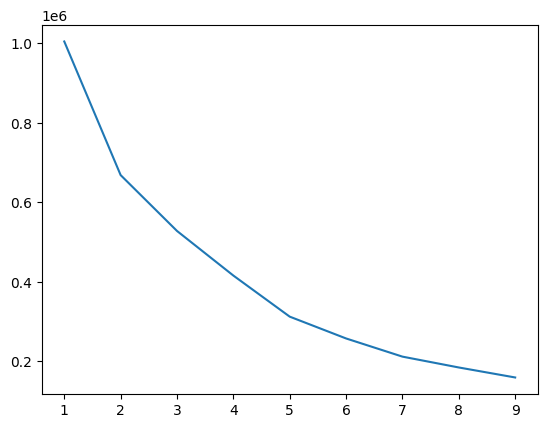

In [243]:
plt.plot(np.arange(1,10), wcss)
# We see that at cluster no. 5 there is an elbow and the wcss is not significantly reducing therafter.

In [242]:
wcss

[1004409.9999999986,
 668483.7480976766,
 528056.0663911569,
 415919.15312399494,
 312606.3602766538,
 257763.57148685085,
 212088.88145462068,
 184815.39472866492,
 159681.64209872787]

In [261]:
# Let's verify whether we have the right no. of cluster using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)

In [262]:
pca_df = pca.fit_transform(data)

In [263]:
pca_df = pd.DataFrame(pca_df, columns = ['PC1', 'PC2'])

<Axes: xlabel='PC1', ylabel='PC2'>

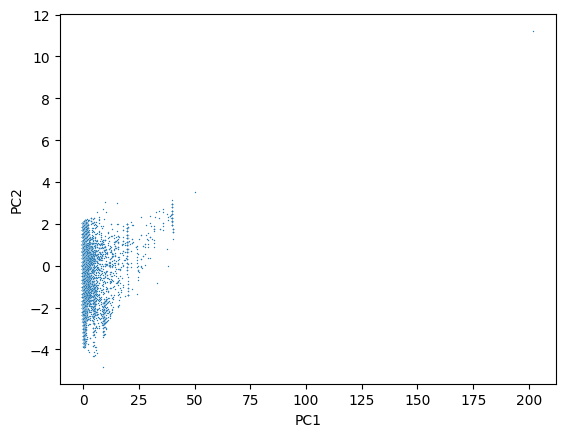

In [276]:
## We see that PCA is not giving us a satisfactory result in identifying the right no. of clusters
sns.scatterplot(pca_df, x = 'PC1', y = 'PC2',s = 1)

In [275]:
pca_df

,PC1,PC2
0,-0.238755,0.021336
1,-0.252868,1.547563
2,-0.052618,-0.137630
3,-0.239100,1.375550
4,-0.261829,0.184820
...,...,...
200877,-0.153234,-1.315536
200878,-0.157432,1.386937
200879,-0.293377,2.047711
200880,0.688804,-0.590343


In [277]:
# Let us try visualising the clusters using UMAP
pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 9.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.1/31.1 MB 6.0 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [278]:
from umap import UMAP

<Axes: xlabel='um1', ylabel='um2'>

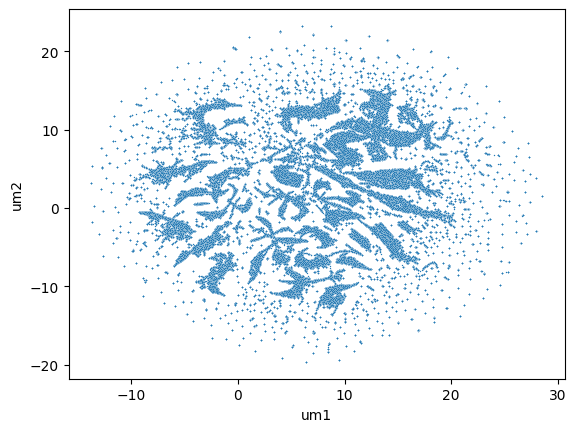

In [279]:
# Let us try UMAP with the default perplexity which is 15.
um = UMAP(n_components = 2)
um_data = um.fit_transform(data)
um_data = pd.DataFrame(um_data, columns = ['um1', 'um2'])
sns.scatterplot(um_data, x = 'um1', y = 'um2',s = 1)

In [ ]:
## Still we are not able to clearly see the clusters.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/umap/spectral.py:550: UserWarning:

Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/umap/spectral.py:550: UserWarning:

Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/umap/spectral.py:550: UserWarning:

Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!

/Library/Frameworks/Python.framework/Versions/3.12/l

<Axes: xlabel='um1', ylabel='um2'>

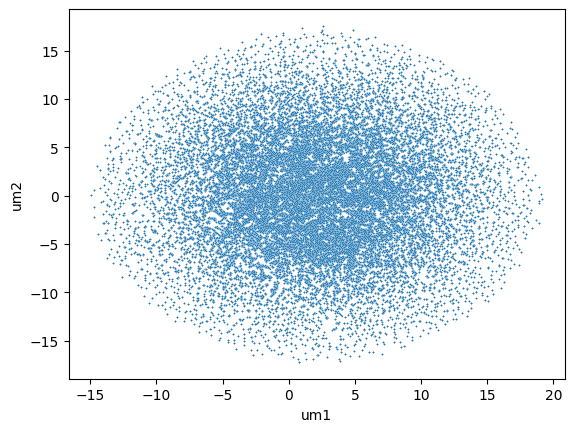

In [282]:
um = UMAP(n_components = 2, n_neighbors = 5)
um_data = um.fit_transform(data)
um_data = pd.DataFrame(um_data, columns = ['um1', 'um2'])
sns.scatterplot(um_data, x = 'um1', y = 'um2',s = 1)

<Axes: xlabel='um1', ylabel='um2'>

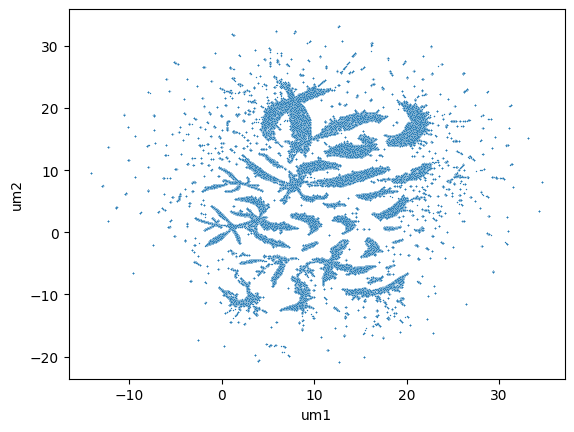

In [283]:
# Let us try UMAP with higher perplexity of 50
um = UMAP(n_components = 2, n_neighbors = 50)
um_data = um.fit_transform(data)
um_data = pd.DataFrame(um_data, columns = ['um1', 'um2'])
sns.scatterplot(um_data, x = 'um1', y = 'um2',s = 1)

In [ ]:
# Still we don't see any clear boundary or cluster.

## Implementing K-means ++ algorithm

In [244]:
kmean = KMeans(n_clusters = 5, init = 'k-means++')

In [284]:
kmean.fit(data)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=5)

In [288]:
# Cluster centroids using kmeans++
kmean.cluster_centers_

array([[-7.47436842e-02, -3.71216857e-01, -5.18300395e-01,
        -6.41991302e-02, -7.64299178e-02],
       [ 1.20044874e+01, -1.56509104e-02, -1.34443313e-01,
         1.77433296e+01,  1.74637645e+01],
       [ 1.02040459e+01, -1.30166054e-01, -1.12150319e+00,
         1.31508528e+00,  2.84010163e+00],
       [-1.24819593e-01, -2.95079437e-01,  1.43738293e+00,
        -8.31317496e-03, -1.49268611e-02],
       [-1.20053649e-02,  1.68254717e+00, -1.96271383e-01,
        -2.77968706e-02, -1.68873976e-02]])

In [289]:
kmean.predict(data)

array([0, 3, 0, ..., 3, 0, 3], dtype=int32)

## Agglomerative clustering.

In [290]:
# Agglomerative clustering is very slow, so let's take a small fraction of the actual data 
adf5 = data.sample(frac = 0.001)

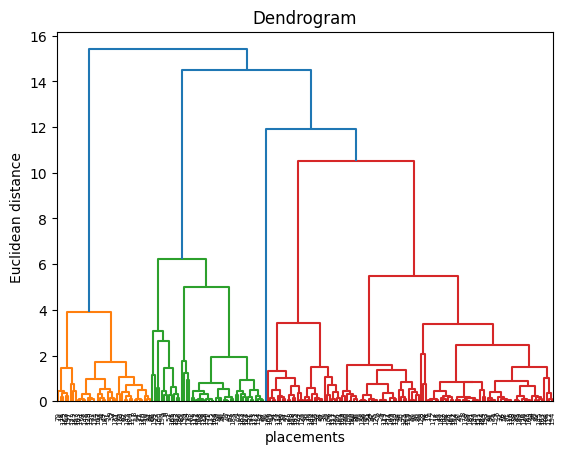

In [291]:
import scipy.cluster.hierarchy as sch
dendrogrm = sch.dendrogram(sch.linkage(df5, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('placements')
plt.ylabel('Euclidean distance')
plt.show()

In [292]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
model.fit(df5)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



AgglomerativeClustering(affinity='euclidean', n_clusters=5)

In [294]:
model.fit_predict(df5)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



array([0, 0, 2, 2, 2, 2, 0, 0, 1, 1, 4, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 0,
       2, 0, 0, 2, 4, 4, 2, 2, 4, 1, 0, 4, 4, 4, 0, 2, 2, 4, 2, 2, 4, 2,
       2, 2, 0, 4, 2, 0, 3, 1, 1, 0, 2, 1, 2, 4, 2, 1, 2, 0, 1, 0, 1, 0,
       0, 0, 0, 2, 2, 0, 2, 4, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 0, 2, 2,
       2, 1, 0, 2, 4, 4, 1, 2, 2, 2, 2, 2, 1, 4, 2, 1, 0, 4, 4, 1, 2, 2,
       1, 4, 2, 2, 0, 2, 2, 1, 0, 0, 2, 2, 2, 1, 0, 4, 2, 4, 2, 1, 2, 0,
       2, 0, 1, 0, 2, 4, 2, 1, 4, 0, 2, 1, 4, 2, 4, 2, 1, 2, 1, 2, 0, 0,
       2, 0, 4, 1, 4, 0, 0, 2, 1, 2, 0, 0, 4, 2, 0, 2, 1, 1, 2, 0, 4, 1,
       2, 1, 2, 0, 2, 2, 2, 0, 2, 4, 0, 1, 0, 2, 0, 2, 2, 2, 2, 0, 0, 1,
       4, 2, 2])

# Insights and Recommendations

## 1. The most common job roles we have is Backend Engineer, Full-stack and Frontend Engineer. Since we are more likely to come across such students, we can have special roadmaps prepared from scaler team for these roles.

## 2.  CTC updated year for most students is after 2019. Our sales team can target those who have their ctc updated before 2019, because these learners will be most likely to look for appraisal. And if they haven't received it recently they are desperate for a job switch.

## 3. From Manual Clustering, if we are considering designation 3 students who are in a company where they are getting paid less than their fellow company collegues. Targeting them with a narrative saying that we will help them in getting appraisal. Because they are already in a good company as their peers are getting paid well. So they need not switch.

## 4. From Manual Clustering, if we are considering class 3 students, Targeting them with a narrative saying that we will help them in getting promotion to a higher position within the same department. Because 1. they are already in a good company as their peers are getting paid well. So they need not switch. And 2. He is probably surrounded by peers who are more senior to him and are leading the team. So for this person rather than appraisal, he can negotiate for a role with more power.

## 5. From Manual Clustering, if we are considering tier 3 students, Targeting them with a narrative saying that we will help them in switching to a new job role. Because point no. 1. they are already in a good company as their peers are getting paid well. So they need not switch. And point no. 2. Their peers are probably in a better job role. So we can help him transition to a higher paying job role.

## 6. Our marketing campains, ads and sales call resources need not be wasted on people who are in class 1, tier 1 or designation 1 as they are already having a high ctc.

## 7. From the top 10 companies analysis we see that there are a list of companies which pays well across different job roles. So we can be sure that we need not waste our time with students who are already in these companies.

## 8. From target encoding of job role column we can get a average ctc of that particular role and compare that with the ctc of a student. If it is lower than that we could ask those learners to upskill and try for an internal promotion because there is still scope for increment.
## 9. From target encoding of job role column we can get a average ctc of that particular role and compare that with the ctc of a student. If it is higher than the job role average, then we can ask them to take our course and upskill and switch to a better job role which is better paying but also aligning with the current skillset of the learner so that he won't be a fresher.
## 10. If we find the bottom 10 companies in terms of ctc, and if a student is in these companies 